In [1]:
import pandas as pd #core
import numpy as np
import geopandas as gpd #geospatial
import matplotlib.pyplot as plt #visuals
import matplotlib.patches as mpatches
import seaborn as sns

# Load the file
df = pd.read_csv('SAPD_Arrests.csv', low_memory=False)

# Shape, first 5 rows, columns
print(f"Shape: {df.shape} rows x {len(df.columns)} columns")
print("\nFirst 5 rows:\n", df.head())
print("\nColumn names:\n", df.columns.tolist())
df.head()


Shape: (160992, 9) rows x 9 columns

First 5 rows:
      Report_ID Report_Date        Person  \
0  39328004496  2023-01-01  3.932800e+10   
1  39329425918  2023-01-01  1.624033e+10   
2  39329822778  2023-01-01  1.624504e+10   
3  39330003757  2023-01-01  1.624317e+10   
4  39332065043  2023-01-01  1.627405e+10   

                                      Offense                    Severity  \
0                 Assault-Bi-Married/Cohab MA         Class A Misdemeanor   
1  Criminal Trespass Into Private Property MB         Class B Misdemeanor   
2                      Burglary Of Vehicle MA         Class A Misdemeanor   
3                               Wanted Person  Misdemeanor (Ladder Crime)   
4                 Unlawful Carrying Weapon MA         Class A Misdemeanor   

  Service_Area Report_Month Zip_Code    DateTime  
0         WEST      January    78201  2026-01-05  
1         WEST      January    78201  2026-01-05  
2         WEST      January    78201  2026-01-05  
3         WEST  

,Report_ID,Report_Date,Person,Offense,Severity,Service_Area,Report_Month,Zip_Code,DateTime
0,39328004496,2023-01-01,3.932800e+10,Assault-Bi-Married/Cohab MA,Class A Misdemeanor,WEST,January,78201,2026-01-05
1,39329425918,2023-01-01,1.624033e+10,Criminal Trespass Into Private Property MB,Class B Misdemeanor,WEST,January,78201,2026-01-05
2,39329822778,2023-01-01,1.624504e+10,Burglary Of Vehicle MA,Class A Misdemeanor,WEST,January,78201,2026-01-05
3,39330003757,2023-01-01,1.624317e+10,Wanted Person,Misdemeanor (Ladder Crime),WEST,January,78201,2026-01-05
4,39332065043,2023-01-01,1.627405e+10,Unlawful Carrying Weapon MA,Class A Misdemeanor,WEST,January,78201,2026-01-05


In [2]:
#### Data Exploration ####

In [3]:
# === Offense ===
print("\n===Unique Offenses (top 10)===:")
print(df['Offense'].value_counts().head(10))

# === 3. Severity ===
print("\n===Unique Severity values:===")
print(df['Severity'].value_counts())

# === Service Area ===
print("\n=== Service Areas ===")
print(df['Service_Area'].value_counts().head(10))

# === Report_Month ===
print("\n=== Report_Months ===")
print(df['Report_Month'].value_counts().sort_index())

# === Zip Codes ===
print("\n=== Zip Codes ===")
zip_col = next((col for col in df.columns if 'zip' in col.lower()), 'Arrest Location')
print("Zip Code values (top 10):")
print(df[zip_col].value_counts().head(10))

# === DateTime (Report_Date) ===
print("\n=== DateTime (Report_Date) ===")
print("Date range:", df['Report_Date'].min(), "to", df['Report_Date'].max())


===Unique Offenses (top 10)===:
Offense
Wanted Person                                        55777
Public Intoxication MC                                7348
Poss Marij - 0 To < 2 Oz MB                           4657
Criminal Trespass Into Private Property MB            4115
Poss Cs Pg 1 - 0 To < 1 Gram (Other Narcotic) FS      3674
Possession Of Drug Paraphernalia MC                   3362
Evade Arrest/Detention MA                             3096
Assault-Bi-Family/Household MA                        2990
Poss Cs Pg 1 - 1 To < 4 Grams (Other Narcotic) F3     2652
Resisting Arrest-Search-Transportation MA             2457
Name: count, dtype: int64

===Unique Severity values:===
Severity
Misdemeanor (Ladder Crime)    57470
Class A Misdemeanor           26473
Class C Misdemeanor           18979
Class B Misdemeanor           18456
State Jail Felony             14894
3rd Degree Felony             13888
2nd Degree Felony              6524
1st Degree Felony              2585
Misdemeanor    

In [4]:
#Finding unique values in Report_ID
df['Report_ID'].nunique(),len(df)


(104004, 160992)

In [5]:
#Checking different values for Report ID
df['Report_ID'].value_counts().head(10)

Report_ID
51971546643    29
66767944718    29
64719004080    25
66729420283    22
51807749557    20
51953848348    20
66664391989    19
60631625469    18
53997282952    17
59350099324    17
Name: count, dtype: int64

In [6]:
#Checking multiple offenses per Report_ID
df.groupby('Report_ID')['Offense'].nunique().sort_values(ascending=False).head(10)


Report_ID
54629449570    10
55432492663    10
62536989422     9
53001738167     8
49333127644     8
52049702661     8
65582701668     8
62686250471     8
61878961193     8
66122086893     8
Name: Offense, dtype: int64

In [7]:
#Checking unique values under Report_ID per Person
df.groupby('Report_ID')['Person'].nunique().sort_values(ascending=False).head(10)


Report_ID
68002131522    1
39305509650    1
39305555777    1
39305583650    1
68000870868    1
68000763895    1
68000606143    1
68000579616    1
68000566254    1
68000475849    1
Name: Person, dtype: int64

In [8]:
#Table showing duplicates for Report_ID with Offenses and Person
df.groupby('Report_ID').agg(
    offenses=('Offense', 'nunique'),
    persons=('Person', 'nunique'),
    rows=('Report_ID', 'size')
).sort_values('rows', ascending=False).head(10)


,offenses,persons,rows
Report_ID,,,
66767944718,1,1,29
51971546643,1,1,29
64719004080,2,1,25
66729420283,3,1,22
51953848348,2,1,20
51807749557,1,1,20
66664391989,2,1,19
60631625469,1,1,18
41180849612,1,1,17


In [9]:
#Conclusion: Report_ID is duplicated if there are multiple offenses per Person

#Confirming One row = one offense for one person within one incident (Report_ID)
assert df.groupby('Report_ID')['Person'].nunique().max() == 1


In [10]:
#### Data Cleaning ####

In [11]:
# Check for duplicates
total_dupes = df.duplicated().sum()  # Full row dupes
print(f"Total duplicate rows: {total_dupes}")
if total_dupes > 0:
    print("Sample dupes:\n", df[df.duplicated()].head())

# Drop dupes if any (keep first occurrence)
df = df.drop_duplicates()
print(f"Shape after dupe drop: {df.shape}")

# Check Missing Values (% per col)
missing_pct = df.isnull().sum() / len(df) * 100
print("\nMissing % per column (sorted):\n", missing_pct[missing_pct > 0].sort_values(ascending=False))



Total duplicate rows: 10020
Sample dupes:
        Report_ID Report_Date        Person  \
32   39743651159  2023-01-06  1.624182e+10   
74   40717559114  2023-01-15  1.626055e+10   
136  41414949838  2023-02-02  1.627824e+10   
137  41414949838  2023-02-02  1.627824e+10   
196  42306649195  2023-02-14  1.627864e+10   

                                               Offense  \
32   Poss W/I Del Cs Pg 1 - 4 To < 200 Grams (Other...   
74                                       Wanted Person   
136                                      Wanted Person   
137                                      Wanted Person   
196                                      Wanted Person   

                       Severity Service_Area Report_Month Zip_Code    DateTime  
32            1st Degree Felony      CENTRAL      January    78201  2026-01-05  
74   Misdemeanor (Ladder Crime)      CENTRAL      January    78201  2026-01-05  
136  Misdemeanor (Ladder Crime)         WEST     February    78201  2026-01-05  
137  Mi

In [12]:
#Fill very small NaN amount for Person column 
df['Person'] = df['Person'].fillna('UNKNOWN_PERSON')

#Converting DateTime to ensure no errors later
df['Report_Date'] = pd.to_datetime(df['Report_Date'], errors='coerce')
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

#Confirmation
df[['Report_Date', 'DateTime']].info()


<class 'pandas.DataFrame'>
Index: 150972 entries, 0 to 160991
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Report_Date  150972 non-null  datetime64[us]
 1   DateTime     150972 non-null  datetime64[us]
dtypes: datetime64[us](2)
memory usage: 3.5 MB


In [13]:
#Creating month order for later plots, graphs, etc. 
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

df['Report_Month'] = pd.Categorical(
    df['Report_Month'],
    categories=month_order,
    ordered=True
)


In [14]:
#Saving a copy
df_clean =df.copy()

In [15]:
#Removed duplicated rows for dataset. Filled missing data on "Person" rows with "Unknown"
#Converted datetime variables to ensure no issues later
#Created a month order for analysis

In [16]:
#### Data Analysis ####

In [17]:
##Top 15 offenses averall##
top_offenses = (
    df_clean['Offense']
    .value_counts()
    .head(15)
    .reset_index()
)

top_offenses.columns = ['Offense', 'Count']
top_offenses


,Offense,Count
0,Wanted Person,47515
1,Public Intoxication MC,7329
2,Poss Marij - 0 To < 2 Oz MB,4636
3,Criminal Trespass Into Private Property MB,4094
4,Poss Cs Pg 1 - 0 To < 1 Gram (Other Narcotic) FS,3586
5,Possession Of Drug Paraphernalia MC,3339
6,Evade Arrest/Detention MA,3075
7,Assault-Bi-Family/Household MA,2926
8,Poss Cs Pg 1 - 1 To < 4 Grams (Other Narcotic) F3,2616
9,Resisting Arrest-Search-Transportation MA,2444


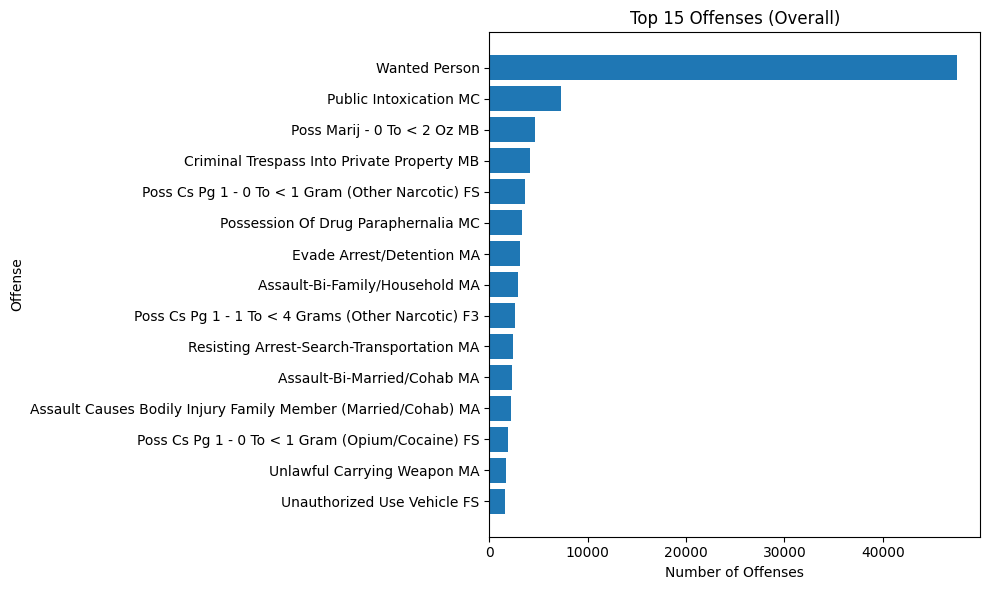

In [18]:
#Bar chart for top 15 offenses
plt.figure(figsize=(10, 6))
plt.barh(top_offenses['Offense'], top_offenses['Count'])
plt.gca().invert_yaxis()
plt.title('Top 15 Offenses (Overall)')
plt.xlabel('Number of Offenses')
plt.ylabel('Offense')
plt.tight_layout()
plt.show()


In [19]:
#Vast majority of offenses are for "Wanted Person" which is a proactive police movement

In [20]:
#Checking info for co-occurence rate with offense
offenses_per_incident = (
    df_clean.groupby('Report_ID')
    .size()
    .rename('offense_count')
)

df_offense_context = df_clean.merge(
    offenses_per_incident,
    on='Report_ID'
)

offense_bundle_stats = (
    df_offense_context
    .groupby('Offense')
    .agg(
        total_occurrences=('Report_ID', 'count'),
        avg_offenses_per_incident=('offense_count', 'mean'),
        pct_multi_offense=(
            'offense_count',
            lambda x: (x > 1).mean()
        )
    )
    .sort_values('total_occurrences', ascending=False)
)

offense_bundle_stats.head(10)


,total_occurrences,avg_offenses_per_incident,pct_multi_offense
Offense,,,
Wanted Person,47515,1.511838,0.340756
Public Intoxication MC,7329,1.401828,0.288034
Poss Marij - 0 To < 2 Oz MB,4636,2.661993,0.909189
Criminal Trespass Into Private Property MB,4094,1.607719,0.424279
Poss Cs Pg 1 - 0 To < 1 Gram (Other Narcotic) FS,3586,2.253765,0.755438
Possession Of Drug Paraphernalia MC,3339,2.724768,0.947290
Evade Arrest/Detention MA,3075,2.558049,0.819837
Assault-Bi-Family/Household MA,2926,1.291524,0.225906
Poss Cs Pg 1 - 1 To < 4 Grams (Other Narcotic) F3,2616,2.268349,0.736621


In [21]:
#Considering the "Wanted Person" offense is the highest but still ~66% individual occurence
#Data is not skewed in terms of co-occurence rate with highest offense


In [22]:
#Highest incidents per zip code (top 15)
zip_incidents = (
    df_clean.groupby('Zip_Code')['Report_ID']
    .nunique()
    .sort_values(ascending=False)
    .head(15)
    .reset_index(name='Incident_Count')
)

zip_incidents


,Zip_Code,Incident_Count
0,78207,8847
1,78205,6027
2,78227,4779
3,78228,4423
4,78237,4410
5,78216,4198
6,78223,3965
7,78201,3796
8,78210,3577
9,78218,3262


In [23]:
#Zip codes with highest overall offense rates

In [24]:
#Compute companion offense stats
offense_context = (
    df_clean
    .merge(
        df_clean.groupby('Report_ID').size().rename('offense_count'),
        on='Report_ID'
    )
)

offense_stats = (
    offense_context
    .groupby('Offense')
    .agg(
        total_occurrences=('Report_ID', 'count'),
        avg_offenses_per_incident=('offense_count', 'mean'),
        pct_multi_offense=(
            'offense_count',
            lambda x: (x > 1).mean()
        )
    )
    .sort_values('pct_multi_offense', ascending=False)
)
print(offense_stats)

                                                    total_occurrences  \
Offense                                                                 
Wager Inside Race Enclosure F3                                      1   
Voyeurism MC                                                        1   
Violation Of Towing Laws MC                                         1   
Violation Of Protective Order - Sexual Offense MA                   1   
Violation Of Private Security Act MA                                1   
...                                                               ...   
Assault Bi Employe/Contractor Civ Com Facility F3                   1   
Aggravated Sexual Assault-Elderly/Disabled Pers...                  1   
Aggravated Sexual Assault-Elderly/Disabled Pers...                  1   
Violation Civil Rights M                                            1   
Abandon Child - Risk Bi F2                                         15   

                                                  

In [25]:
#Filtering companion offenses that occur 90% or higher
companion_offenses = offense_stats[
    offense_stats['pct_multi_offense'] >= 0.90
].index.tolist()

len(companion_offenses), companion_offenses[:10]


(338,
 ['Wager Inside Race Enclosure F3',
  'Voyeurism MC',
  'Violation Of Towing Laws MC',
  'Violation Of Protective Order - Sexual Offense MA',
  'Violation Of Private Security Act MA',
  'Agg Kidnapping W/ Deadly Weapon F1',
  'Agg Kidnapping For Ransom/Reward Safe Release F2',
  'Agg Kidnapping Bod Injury F1',
  'Accident Inv Pedestrian/Road User In Crosswalk MA',
  'Abuse Of Corpse MA'])

In [26]:
#Companion offenses are ones that typically occur secondary to another offense
#These can also skew results as an offense like "Resist Arrest" is a subsequent crime
#Created a copy of the data with the companion offenses that have a 90% rate or higher filtered out

In [27]:
#Creating a copy for filtered analysis and standalone
df_primary = df_clean[
    ~df_clean['Offense'].isin(companion_offenses)
].copy()


In [28]:
#Viewing multiple offense rate before and after filtering
def multi_offense_rate(df):
    return (
        df.groupby('Report_ID')
        .size()
        .gt(1)
        .mean()
    )

print("Original multi-offense rate:", multi_offense_rate(df_clean))
print("Filtered multi-offense rate:", multi_offense_rate(df_primary))


Original multi-offense rate: 0.3132091073420253
Filtered multi-offense rate: 0.2461516006616717


In [29]:
#Viewing original average offense per incident before and after
print("Original avg offenses/incident:",
      df_clean.groupby('Report_ID').size().mean())

print("Filtered avg offenses/incident:",
      df_primary.groupby('Report_ID').size().mean())


Original avg offenses/incident: 1.4515980154609438
Filtered avg offenses/incident: 1.3115111413836722


In [30]:
## Analyzing data through zip codes ##

In [31]:
#Grouping zip codes by standard dataset
zip_unfiltered = (
    df_clean
    .groupby('Zip_Code')['Report_ID']
    .nunique()
    .reset_index(name='Incidents_Unfiltered')
)

#Grouping zip codes by filtered dataset
zip_filtered = (
    df_primary
    .groupby('Zip_Code')['Report_ID']
    .nunique()
    .reset_index(name='Incidents_Filtered')
)
#Merging side by side
zip_comparison = (
    zip_unfiltered
    .merge(
        zip_filtered,
        on='Zip_Code',
        how='left'
    )
    .fillna(0)
)
zip_comparison[['Incidents_Unfiltered', 'Incidents_Filtered']] = (
    zip_comparison[['Incidents_Unfiltered', 'Incidents_Filtered']]
    .astype(int)
)


#Difference in change and % 
zip_comparison['Difference'] = (
    zip_comparison['Incidents_Unfiltered']
    - zip_comparison['Incidents_Filtered']
)

zip_comparison['Pct_Reduction'] = (
    zip_comparison['Difference']
    / zip_comparison['Incidents_Unfiltered']
).round(3)

#Displaying information through chart
zip_comparison.sort_values(
    'Pct_Reduction',
    ascending=False
).head(15)


,Zip_Code,Incidents_Unfiltered,Incidents_Filtered,Difference,Pct_Reduction
60,78263,3,2,1,0.333
65,Not Listed,34,31,3,0.088
15,78216,4198,4096,102,0.024
7,78208,426,416,10,0.023
14,78215,1191,1166,25,0.021
58,78260,48,47,1,0.021
64,78288,49,48,1,0.020
51,78253,181,178,3,0.017
4,78205,6027,5928,99,0.016
0,78201,3796,3739,57,0.015


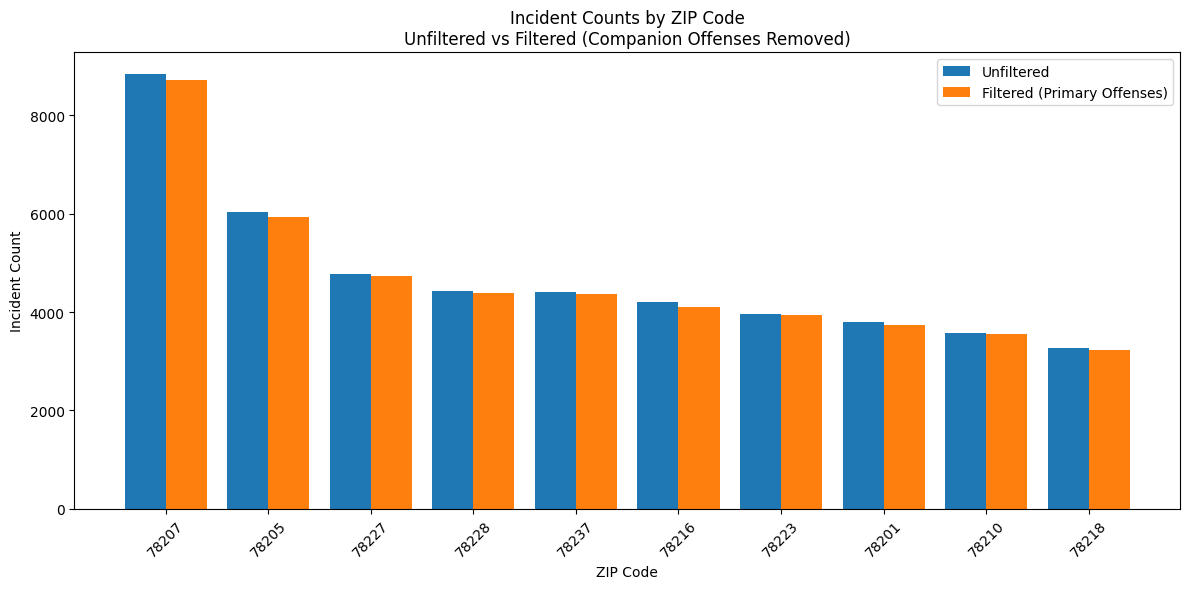

In [32]:
#Plotting differences on a bar chart

top_zips = (
    zip_comparison
    .sort_values('Incidents_Unfiltered', ascending=False)
    .head(10)
)

x = np.arange(len(top_zips))
width = 0.4

plt.figure(figsize=(12, 6))

plt.bar(
    x - width/2,
    top_zips['Incidents_Unfiltered'],
    width,
    label='Unfiltered'
)

plt.bar(
    x + width/2,
    top_zips['Incidents_Filtered'],
    width,
    label='Filtered (Primary Offenses)'
)

plt.xticks(x, top_zips['Zip_Code'], rotation=45)
plt.xlabel('ZIP Code')
plt.ylabel('Incident Count')
plt.title('Incident Counts by ZIP Code\nUnfiltered vs Filtered (Companion Offenses Removed)')
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
# Uploading gdp file for geodata
zcta = gpd.read_file(r"C:\Users\chris\Documents\DataPortfolio\SanAntonioCrime\tl_2020_us_zcta520")
zcta.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,35592,35592,B5,G6350,S,298552385,235989,+33.7427261,-088.0973903,"POLYGON ((-88.24735 33.6539, -88.24713 33.6541..."
1,35616,35616,B5,G6350,S,559506992,41870756,+34.7395036,-088.0193814,"POLYGON ((-88.13997 34.58184, -88.13995 34.582..."
2,35621,35621,B5,G6350,S,117838488,409438,+34.3350314,-086.7270557,"POLYGON ((-86.81659 34.3496, -86.81648 34.3496..."
3,35651,35651,B5,G6350,S,104521045,574316,+34.4609087,-087.4801507,"POLYGON ((-87.53087 34.42492, -87.53082 34.429..."
4,36010,36010,B5,G6350,S,335675180,236811,+31.6598950,-085.8128958,"POLYGON ((-85.95712 31.67744, -85.95676 31.677..."


In [34]:
# Ensure your ZIP codes in df_primary are strings
df_primary['Zip_Code'] = df_primary['Zip_Code'].astype(str)

# Get the unique SAPD ZIP codes
sa_zips = df_primary['Zip_Code'].unique()

# Filter shapefile to only these ZIPs
zip_map_sa = zcta[zcta['ZCTA5CE20'].isin(sa_zips)].copy()

#Setting colors for service areas
service_area_colors = {
    'CENTRAL': 'Blues',
    'DOWNTOWN': 'Oranges',
    'EAST': 'Reds',
    'WEST': 'Purples',
    'SOUTH': 'Greens',
    'NORTH': 'Greys'
}


In [35]:
# Count unique incidents (Report_ID) per ZIP
zip_incidents = (
    df_primary
    .groupby('Zip_Code')['Report_ID']
    .nunique()
    .reset_index(name='Incident_Count')
)

# Merge with the shapefile
zip_map_sa = zip_map_sa.merge(
    zip_incidents,
    left_on='ZCTA5CE20',
    right_on='Zip_Code',
    how='left'
)

# Fill ZIPs with no incidents with 0
zip_map_sa['Incident_Count'] = zip_map_sa['Incident_Count'].fillna(0)


Reference: ZIP Codes by Primary Offense Incident Count


,Zip_Code,Incident_Count
0,78207,8724
1,78205,5928
2,78227,4732
3,78228,4383
4,78237,4365
5,78216,4096
6,78223,3933
7,78201,3739
8,78210,3545
9,78218,3237


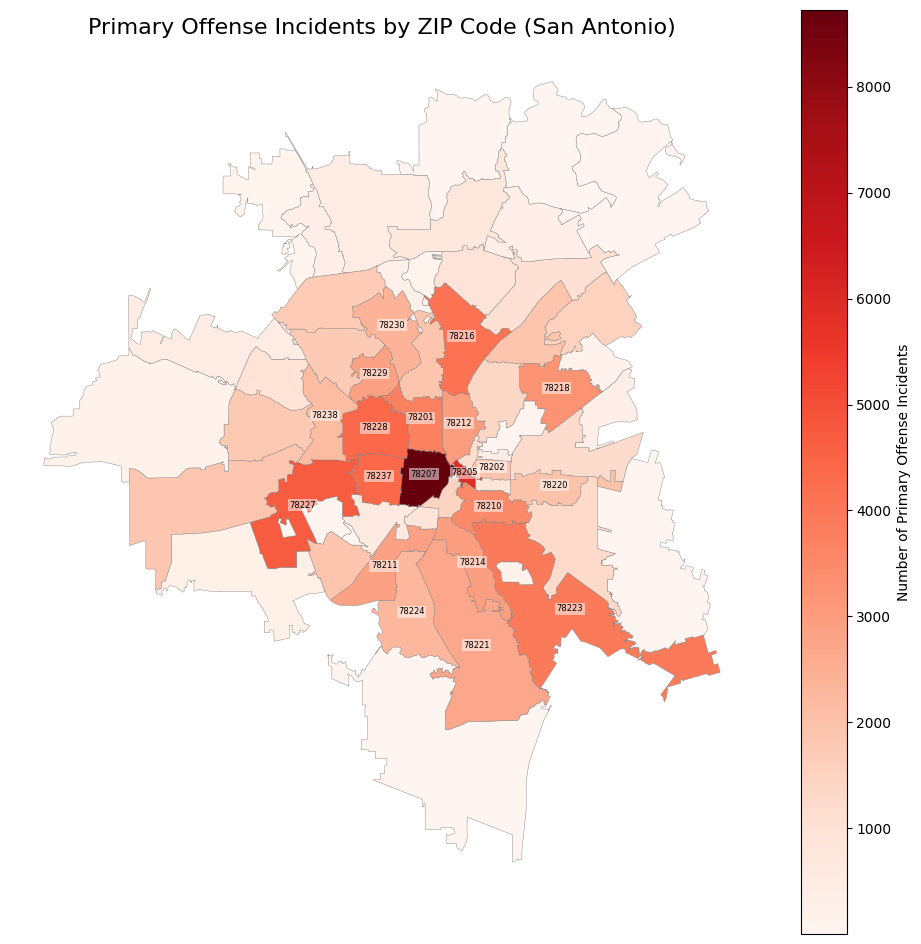

In [36]:
# --- Aggregate incidents per ZIP ---
df_primary['Zip_Code'] = df_primary['Zip_Code'].astype(str)

zip_incidents = (
    df_primary
    .groupby('Zip_Code')['Report_ID']
    .nunique()
    .reset_index(name='Incident_Count')
)

# --- Filter shapefile to SAPD ZIPs ---
sa_zips = zip_incidents['Zip_Code'].unique()
zip_map_sa = zcta[zcta['ZCTA5CE20'].isin(sa_zips)].copy()

# --- Merge shapefile with incident counts ---
zip_map_sa = zip_map_sa.merge(
    zip_incidents,
    left_on='ZCTA5CE20',
    right_on='Zip_Code',
    how='left'
)
zip_map_sa['Incident_Count'] = zip_map_sa['Incident_Count'].fillna(0)

# --- Prepare top ZIPs for labeling ---
top_zips = zip_map_sa.sort_values('Incident_Count', ascending=False).head(20)

# --- Plot map ---
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

zip_map_sa.plot(
    column='Incident_Count',
    cmap='Reds',
    linewidth=0.3,
    edgecolor='gray',
    legend=True,
    legend_kwds={'label': "Number of Primary Offense Incidents"},
    ax=ax
)

# Label top ZIPs with a subtle white box
for idx, row in top_zips.iterrows():
    plt.annotate(
        row['ZCTA5CE20'],
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        horizontalalignment='center',
        fontsize=6,
        color='black',
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1)
    )

ax.set_title('Primary Offense Incidents by ZIP Code (San Antonio)', fontsize=16)
ax.axis('off')

# --- Reference table of all ZIPs ---
# Sorted by incident count descending
zip_reference = zip_incidents.sort_values('Incident_Count', ascending=False).reset_index(drop=True)

# Show top 20 for reference 
print("Reference: ZIP Codes by Primary Offense Incident Count")
display(zip_reference.head(20))  
plt.show()



In [37]:
#This geograph shows the number of incidents pertaining to zip code
#on a heat map. The darker they are the more arrests that happen. 

In [38]:
#Grouping service areas by zip code
zip_service_area = (
    df_primary
    .groupby(['Zip_Code', 'Service_Area'])['Report_ID']
    .nunique()
    .reset_index(name='Incident_Count')
)

# Get dominant service area per ZIP
zip_service_area = (
    zip_service_area
    .sort_values(['Zip_Code', 'Incident_Count'], ascending=[True, False])
    .drop_duplicates(subset='Zip_Code')
)
#Merging service area into zip code map
zip_map_sa = zip_map_sa.merge(
    zip_service_area[['Zip_Code', 'Service_Area']],
    left_on='ZCTA5CE20',
    right_on='Zip_Code',
    how='left'
)
zip_service_reference = (
    zip_map_sa[['ZCTA5CE20', 'Service_Area', 'Incident_Count']]
    .rename(columns={'ZCTA5CE20': 'Zip_Code'})
    .sort_values('Incident_Count', ascending=False)
    .reset_index(drop=True)
)

display(zip_service_reference.head(20))

,Zip_Code,Service_Area,Incident_Count
0,78207,CENTRAL,8724
1,78205,DOWNTOWN,5928
2,78227,WEST,4732
3,78228,WEST,4383
4,78237,WEST,4365
5,78216,NORTH,4096
6,78223,SOUTH,3933
7,78201,WEST,3739
8,78210,EAST,3545
9,78218,EAST,3237


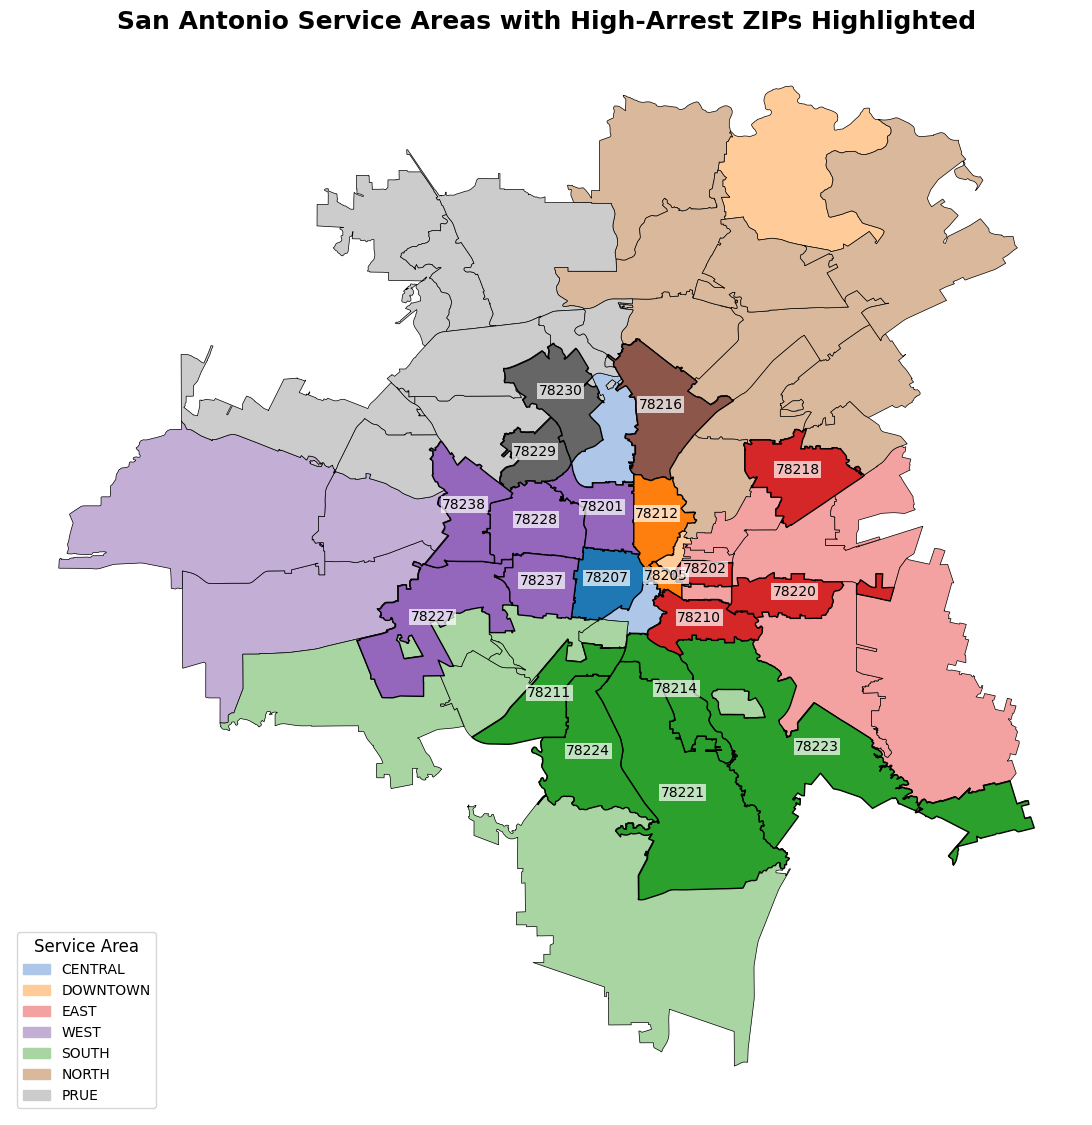

In [39]:
# Base (light) and highlight (dark) colors
base_colors = {
    'CENTRAL': '#aec6e8',    # light blue
    'DOWNTOWN': '#ffcc99',   # light orange
    'EAST': '#f4a1a1',       # light red
    'WEST': '#c3aed6',       # light purple
    'SOUTH': '#a8d5a2',      # light green
    'NORTH': '#d9b89c'       # light brown
}

highlight_colors = {
    'CENTRAL': '#1f77b4',    # dark blue
    'DOWNTOWN': '#ff7f0e',   # dark orange
    'EAST': '#d62728',       # dark red
    'WEST': '#9467bd',       # dark purple
    'SOUTH': '#2ca02c',      # dark green
    'NORTH': '#8c564b'       # dark brown
}

# Ensure all service areas in the data are accounted for
all_areas = zip_map_sa['Service_Area'].unique()
for area in all_areas:
    if area not in base_colors:
        base_colors[area] = '#cccccc'       # light gray for unknown
        highlight_colors[area] = '#666666'  # dark gray for unknown

# Top ZIPs to highlight
top_zips = zip_map_sa.sort_values('Incident_Count', ascending=False).head(20)

# Start figure
fig, ax = plt.subplots(1, 1, figsize=(14, 14))

# --- Base layer: all ZIPs colored by service area ---
for area, color in base_colors.items():
    subset = zip_map_sa[zip_map_sa['Service_Area'] == area]
    subset.plot(
        color=color,
        edgecolor='black',
        linewidth=0.5,
        ax=ax
    )

# --- Highlight layer: only top ZIPs, dark color of service area ---
for idx, row in top_zips.iterrows():
    area = row['Service_Area']
    color = highlight_colors.get(area, '#000000')  # fallback if missing
    gdf_row = gpd.GeoDataFrame([row], geometry='geometry')
    gdf_row.plot(
        color=color,
        edgecolor='black',
        linewidth=1,
        ax=ax
    )

# --- Annotate top ZIPs ---
for idx, row in top_zips.iterrows():
    plt.annotate(
        row['ZCTA5CE20'],
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        fontsize=10,
        ha='center',
        color='black',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1)
    )

# --- Legend for service areas ---
patches = [mpatches.Patch(color=color, label=area) for area, color in base_colors.items()]
ax.legend(handles=patches, title='Service Area', loc='lower left', fontsize=10, title_fontsize=12)

# --- Final touches ---
ax.set_title(
    'San Antonio Service Areas with High-Arrest ZIPs Highlighted',
    fontsize=18,
    fontweight='bold'
)
ax.axis('off')

plt.show()


In [40]:
#This map shows service areas colored with specific zip codes darkened
#for the higher areas of arrests

In [41]:
# Top offense per service area
top_offense_area = (
    df_primary.groupby(['Service_Area', 'Offense'])
    .size()
    .reset_index(name='Incident_Count')
)

# Pick top offense per service area
top_offense_area = top_offense_area.sort_values(['Service_Area', 'Incident_Count'], ascending=[True, False])
top_offense_area = top_offense_area.groupby('Service_Area').first().reset_index()

top_offense_area


,Service_Area,Offense,Incident_Count
0,CENTRAL,Wanted Person,7479
1,DOWNTOWN,Wanted Person,2671
2,EAST,Wanted Person,7747
3,NORTH,Wanted Person,5311
4,PRUE,Wanted Person,5191
5,SOUTH,Wanted Person,9254
6,WEST,Wanted Person,9862


In [42]:
#Top incidents per service area and they are all "wanted person" offenses

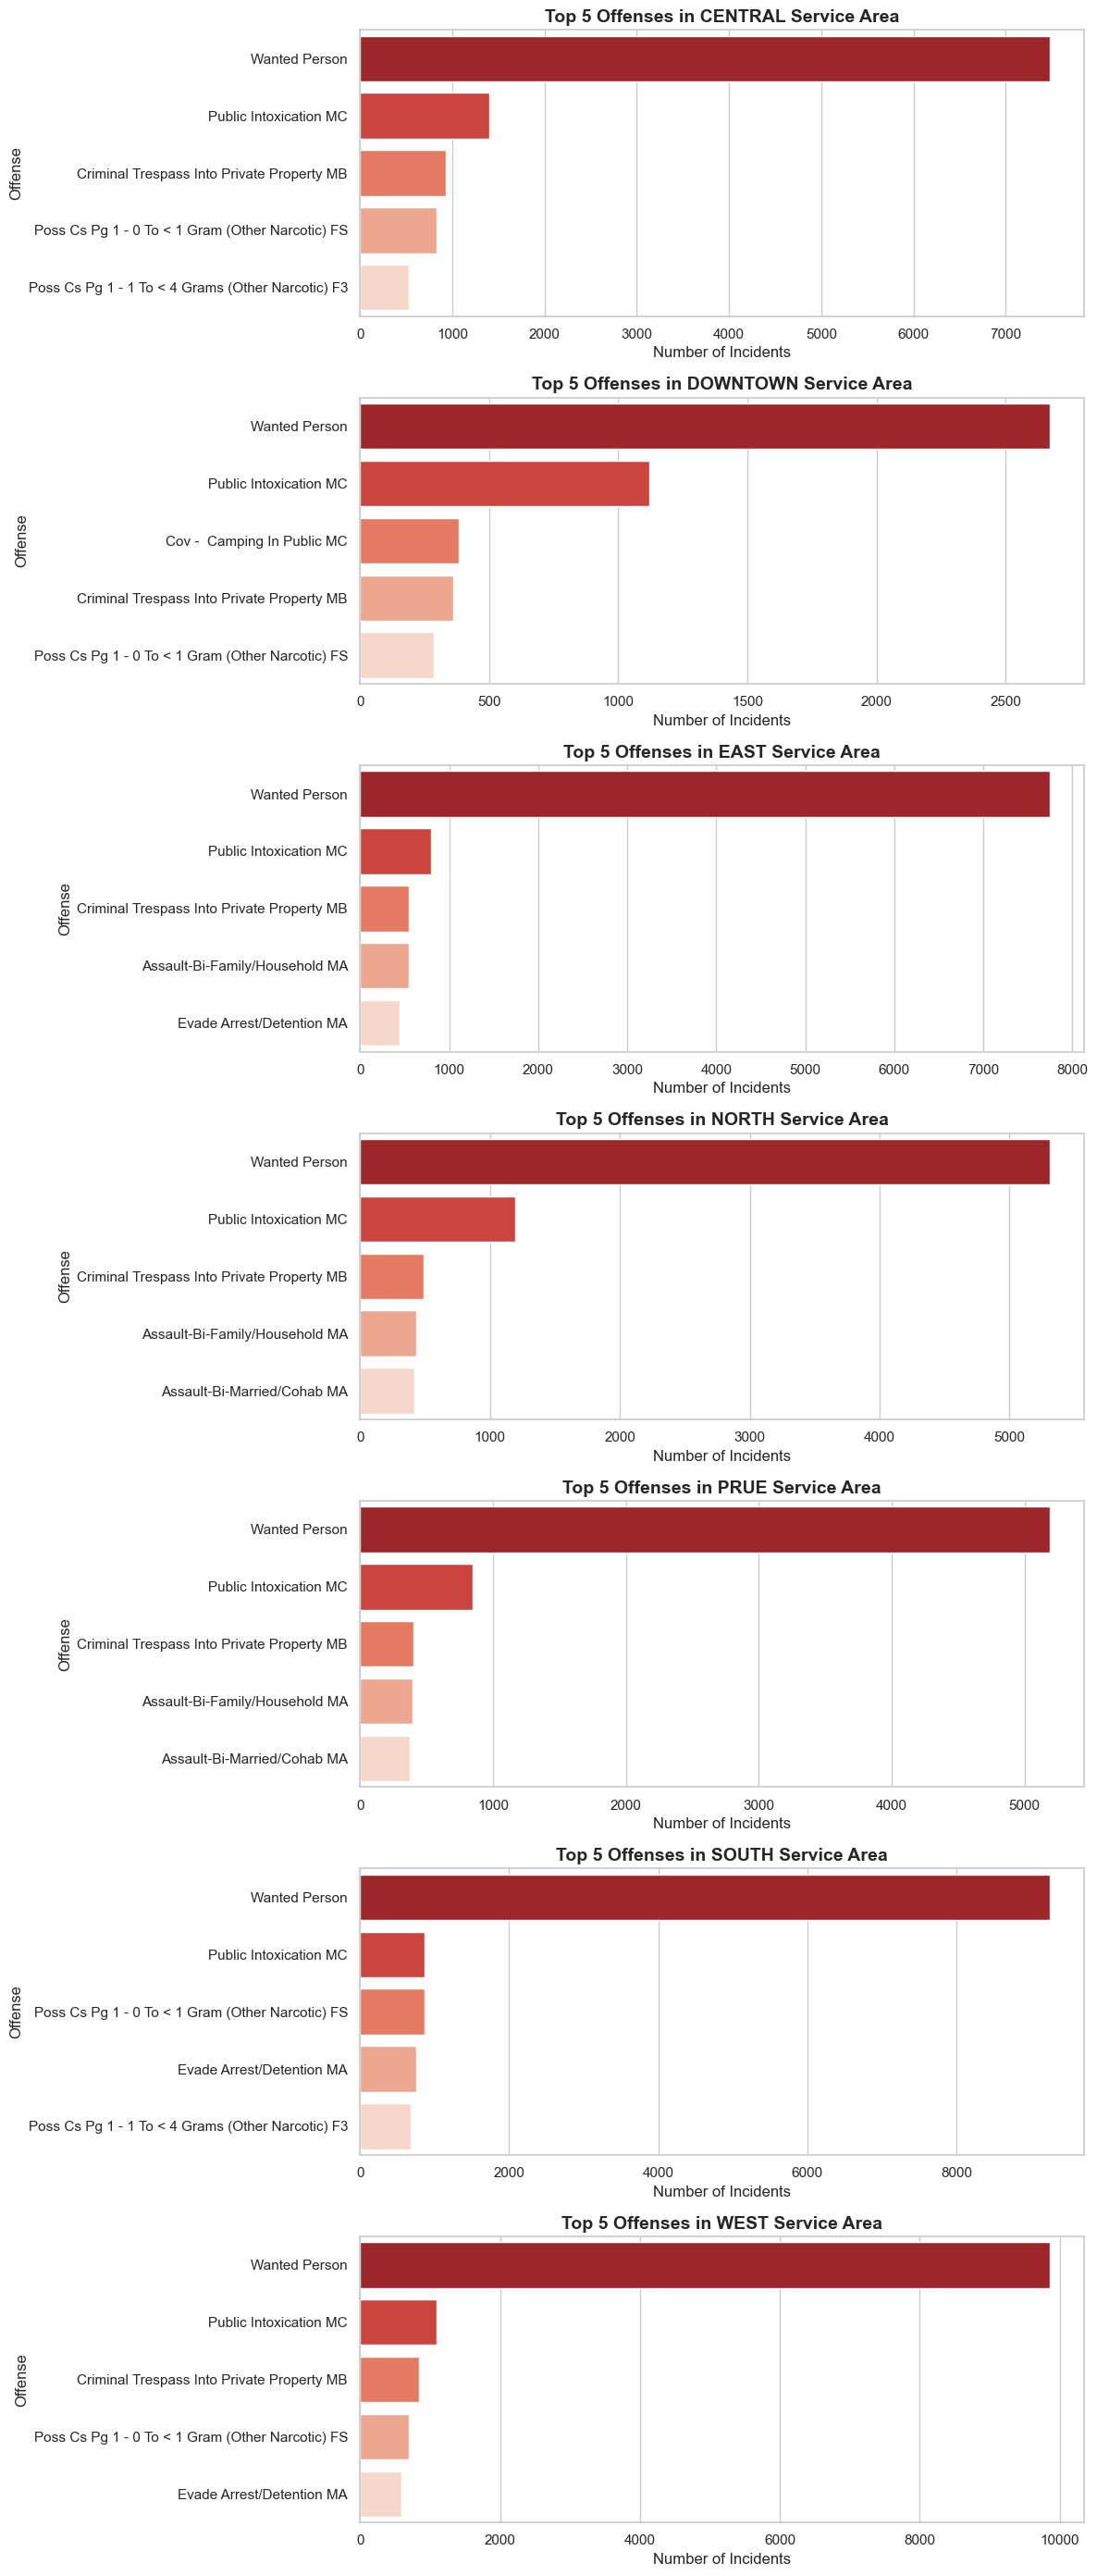

In [43]:
#Building grouping and bar plot
sns.set(style="whitegrid")

service_areas = sorted(df_primary['Service_Area'].dropna().unique())

fig, axes = plt.subplots(len(service_areas), 1, figsize=(12, len(service_areas)*4), sharex=False)

if len(service_areas) == 1:
    axes = [axes]

for ax, area in zip(axes, service_areas):
    area_data = df_primary[df_primary['Service_Area'] == area]
    top_offenses = area_data['Offense'].value_counts().head(5)

    sns.barplot(
        x=top_offenses.values,
        y=top_offenses.index,
        ax=ax,
        palette="Reds_r",
        hue=top_offenses.index,  
        dodge=False,             
        legend=False            
    )
    
    ax.set_title(f'Top 5 Offenses in {area} Service Area', fontsize=14, fontweight='bold')
    ax.set_xlabel('Number of Incidents')
    ax.set_ylabel('Offense')

plt.tight_layout()
plt.show()



In [44]:
#Initial EDA showing arrests dominated by "Wanted Person", which reflects proactive warrant 
#enforcement rather than underlying criminal activity. We can filter it to better represent 
#active crime patterns moving forward. 


In [45]:
#Removing "wanted person from the data and we see our results for highest
#incidents for each service area. Once again it is dominated by one offense

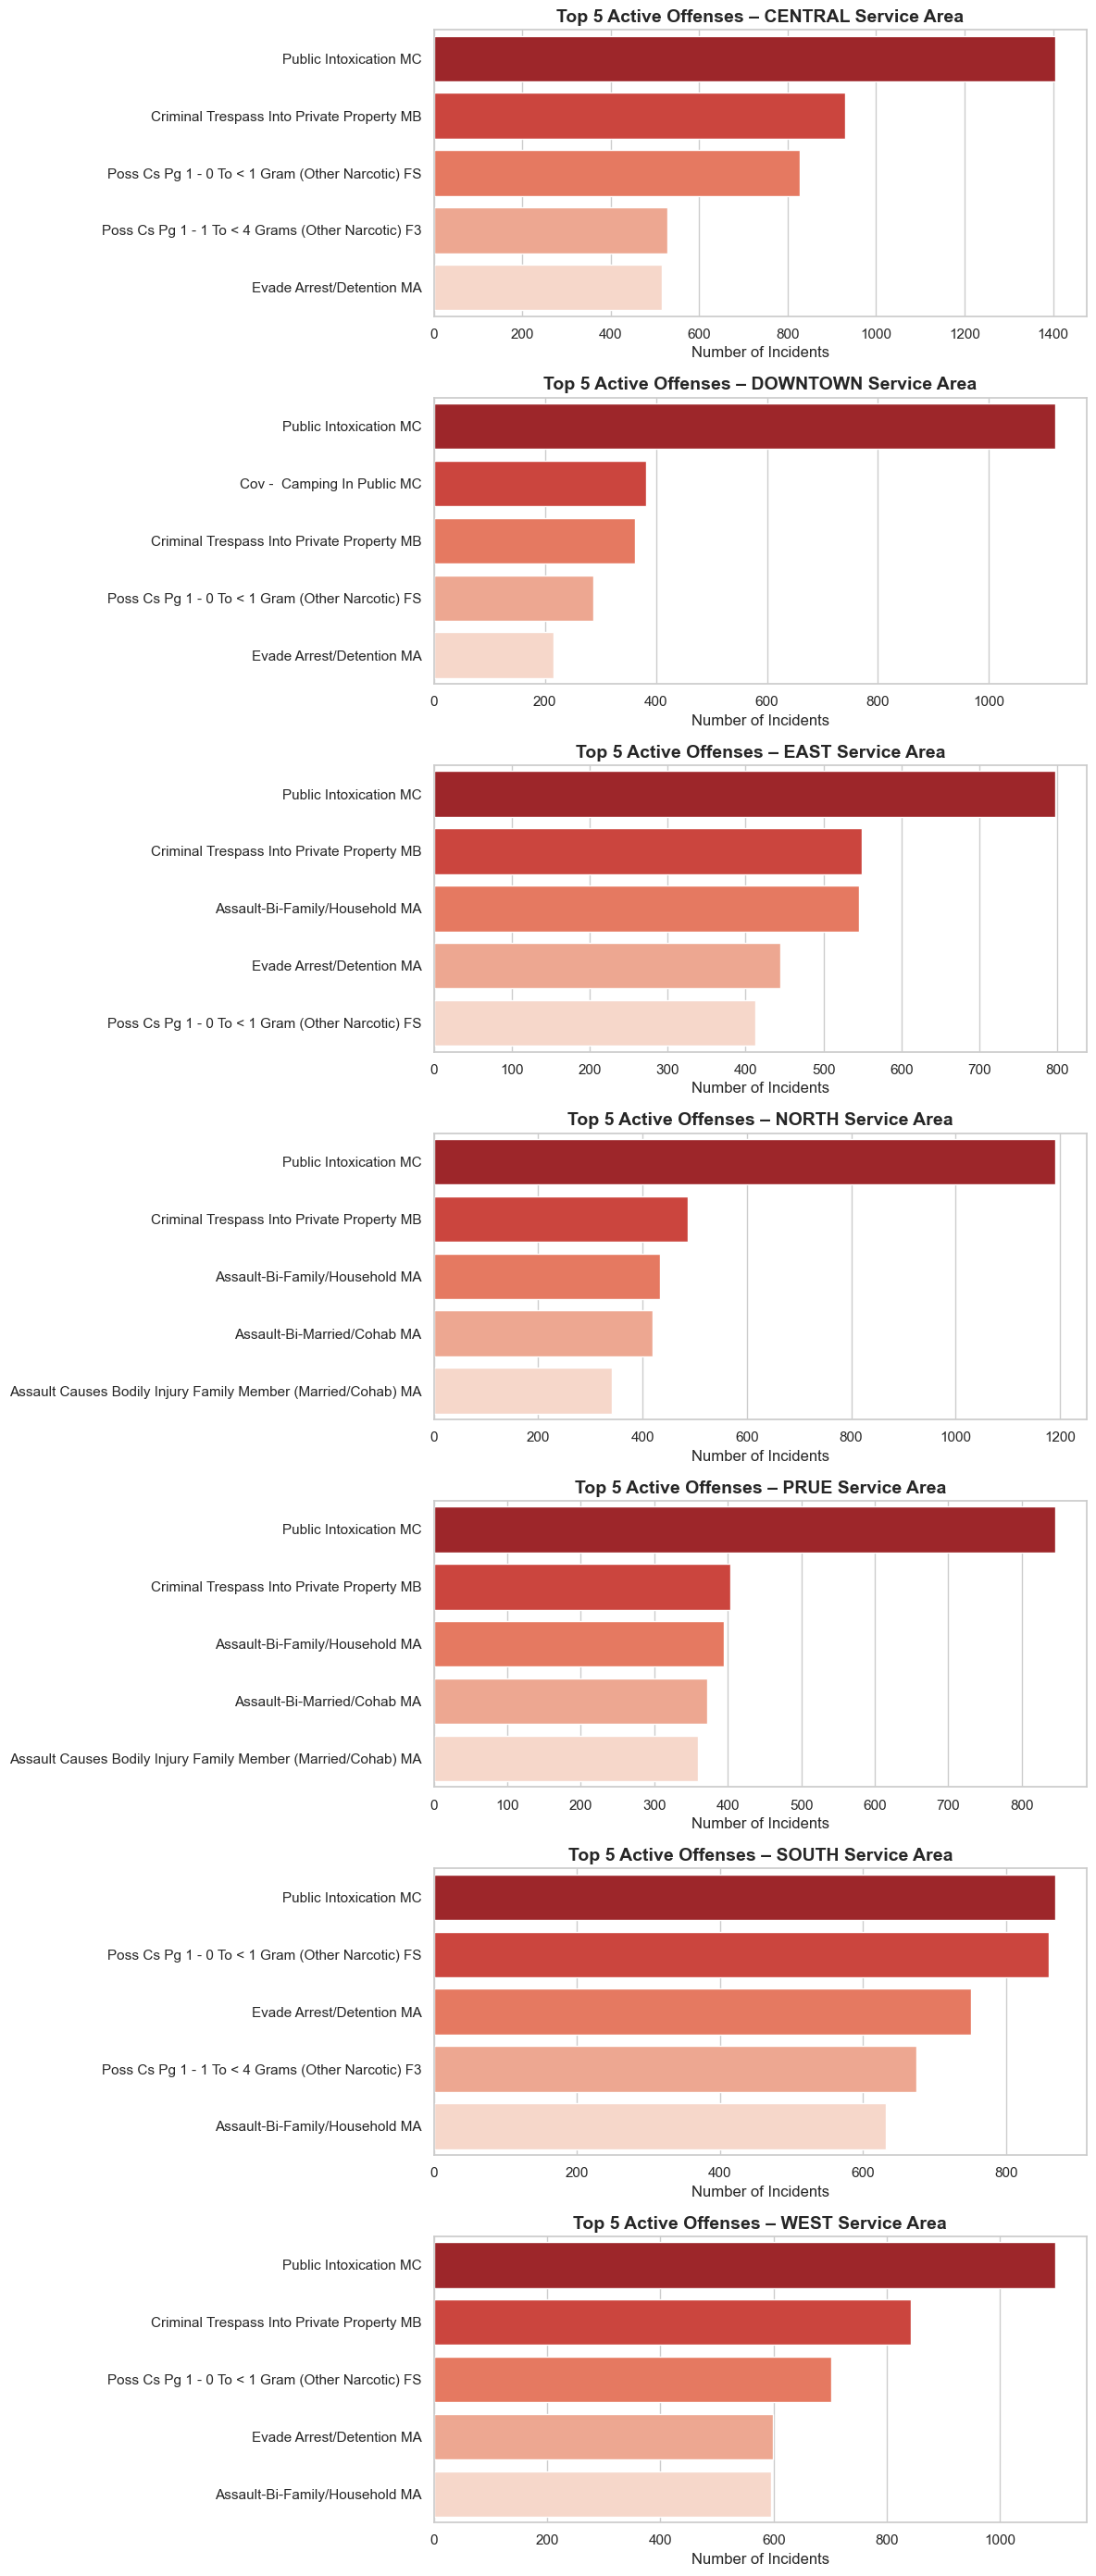

In [46]:
#Using primary dataset to exclude Wanted Person
df_active = df_primary[
    ~df_primary['Offense'].str.contains(
        'WANTED PERSON',
        case=False,
        na=False
    )
].copy()

#Sort service areas
service_areas = sorted(df_active['Service_Area'].dropna().unique())

#Building bar plots
fig, axes = plt.subplots(len(service_areas), 1, figsize=(12, len(service_areas)*4))

if len(service_areas) == 1:
    axes = [axes]

for ax, area in zip(axes, service_areas):
    area_data = df_active[df_active['Service_Area'] == area]
    top_offenses = area_data['Offense'].value_counts().head(5)

    sns.barplot(
        x=top_offenses.values,
        y=top_offenses.index,
        hue=top_offenses.index,
        palette="Reds_r",
        legend=False,
        dodge=False,
        ax=ax
    )

    ax.set_title(f'Top 5 Active Offenses – {area} Service Area', fontsize=14, fontweight='bold')
    ax.set_xlabel('Number of Incidents')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [47]:
#Much more even disbursement of data showing much more reactive arrests

In [48]:
# Top offense per service area
top_offense_area = (
    df_active.groupby(['Service_Area', 'Offense'])
    .size()
    .reset_index(name='Incident_Count')
)

# Pick top offense per service area
top_offense_area = top_offense_area.sort_values(['Service_Area', 'Incident_Count'], ascending=[True, False])
top_offense_area = top_offense_area.groupby('Service_Area').first().reset_index()

top_offense_area

,Service_Area,Offense,Incident_Count
0,CENTRAL,Public Intoxication MC,1406
1,DOWNTOWN,Public Intoxication MC,1120
2,EAST,Public Intoxication MC,798
3,NORTH,Public Intoxication MC,1192
4,PRUE,Public Intoxication MC,846
5,SOUTH,Public Intoxication MC,869
6,WEST,Public Intoxication MC,1098


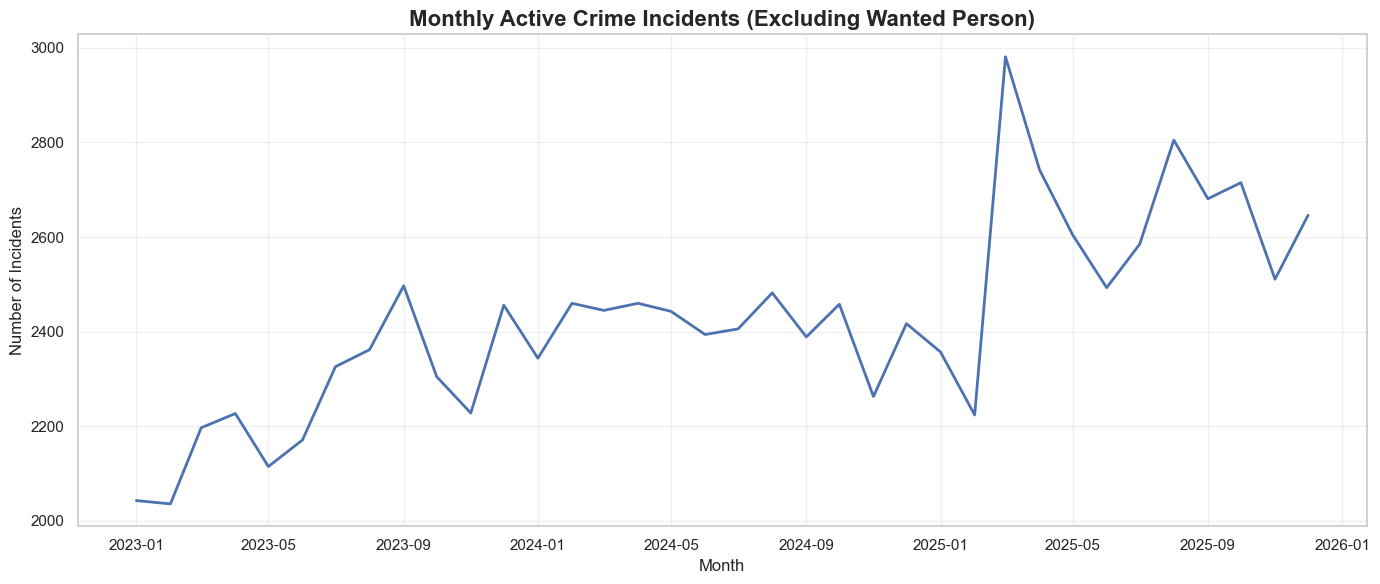

In [49]:
#Grouping stats for monthly crime
df_active['Report_Date'] = pd.to_datetime(df_active['Report_Date'])
df_active['Year'] = df_active['Report_Date'].dt.year
df_active['Month'] = df_active['Report_Date'].dt.to_period('M')

monthly_crime = (
    df_active
    .groupby('Month')
    .size()
    .reset_index(name='Incident_Count')
)

monthly_crime['Month'] = monthly_crime['Month'].dt.to_timestamp()

#Building line graph 
plt.figure(figsize=(14,6))
plt.plot(
    monthly_crime['Month'],
    monthly_crime['Incident_Count'],
    linewidth=2
)

plt.title('Monthly Active Crime Incidents (Excluding Wanted Person)', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [50]:
#Line graph showing incidents over three years in increments. 
#We can see a steady rise since 01/2023 indicating a change

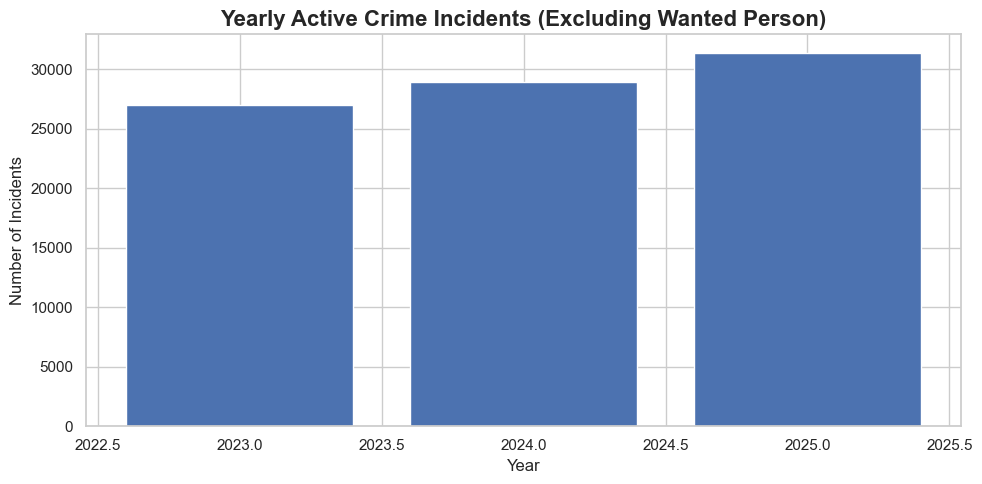

In [51]:
#Yearly crim grouping
yearly_crime = (
    df_active
    .groupby('Year')
    .size()
    .reset_index(name='Incident_Count')
)
#Build barchart
plt.figure(figsize=(10,5))
plt.bar(
    yearly_crime['Year'],
    yearly_crime['Incident_Count']
)

plt.title('Yearly Active Crime Incidents (Excluding Wanted Person)', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()


In [52]:
#Amount of incidents each year shows a steady rise each year

In [53]:
#Creating groups for monthly view of years 
df_active['Report_Date'] = pd.to_datetime(df_active['Report_Date'])
df_active['Year'] = df_active['Report_Date'].dt.year
df_active['Month'] = df_active['Report_Date'].dt.month

monthly_by_year = (
    df_active
    .groupby(['Year', 'Month'], as_index=False)
    .size()
    .rename(columns={'size': 'Incident_Count'})
)

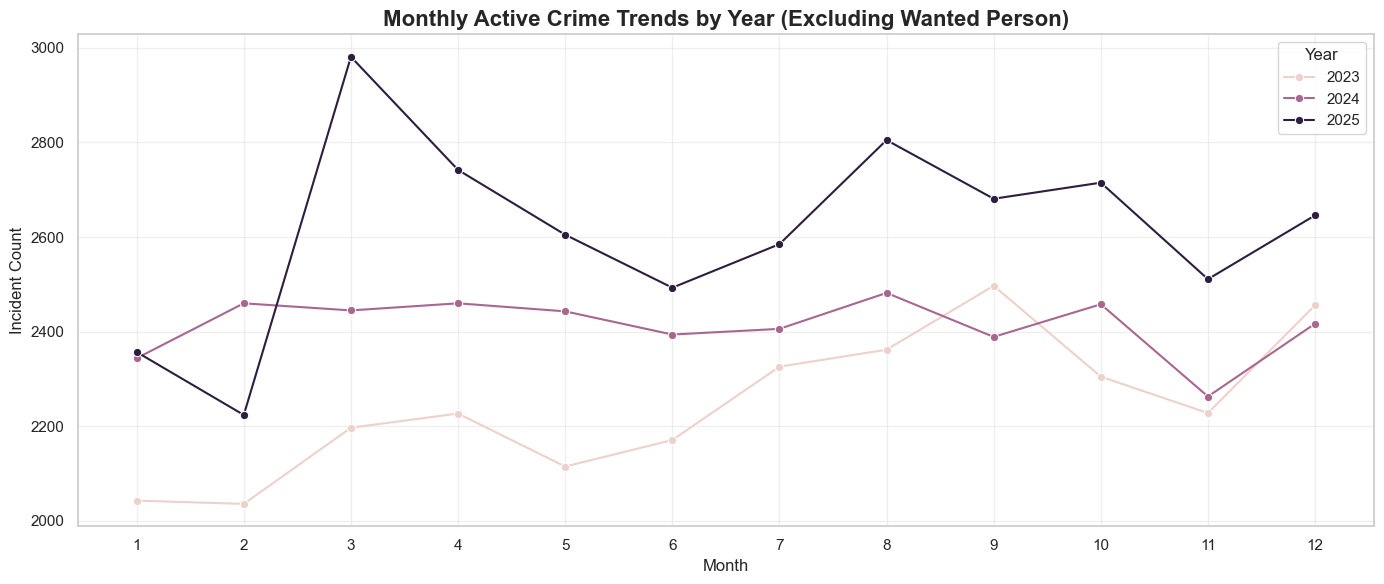

In [54]:
#Building figure for monthly trends for all three years
plt.figure(figsize=(14,6))

sns.lineplot(
    data=monthly_by_year,
    x='Month',
    y='Incident_Count',
    hue='Year',
    marker='o'
)

plt.title('Monthly Active Crime Trends by Year (Excluding Wanted Person)', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.xticks(range(1,13))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [55]:
# All three years plotted on a line graph overlayed
#We can see a huge spike from 02/2025-03/2025

In [56]:
#Normalizing arrests per day
monthly_by_year['Days_In_Month'] = pd.to_datetime(
    monthly_by_year['Year'].astype(str) + '-' +
    monthly_by_year['Month'].astype(str) + '-01'
).dt.days_in_month

monthly_by_year['Arrests_Per_Day'] = (
    monthly_by_year['Incident_Count'] / monthly_by_year['Days_In_Month']
)
#Checking shift between February and March from spike in graph
march_2025 = df_active[
    (df_active['Report_Date'].dt.year == 2025) &
    (df_active['Report_Date'].dt.month == 3)
]

feb_2025 = df_active[
    (df_active['Report_Date'].dt.year == 2025) &
    (df_active['Report_Date'].dt.month == 2)
]

compare = pd.concat([
    feb_2025['Offense'].value_counts(normalize=True).rename('Feb'),
    march_2025['Offense'].value_counts(normalize=True).rename('Mar')
], axis=1).fillna(0)

#Checking comparison in % points
delta = (compare['Mar'] - compare['Feb']).sort_values(ascending=False).head(10)
(delta * 100).round(2).astype(str) + '%'



Offense
Public Intoxication MC                                    1.18%
Criminal Trespass Into Private Property MB                0.93%
Poss Cs Pg 1 - 0 To < 1 Gram (Other Narcotic) FS          0.84%
Assault Bodily Injury MA                                  0.77%
Poss Cs Pg 1 - 1 To < 4 Grams (Other Narcotic) F3          0.6%
Retaliation F3                                            0.52%
Interfere W/ Duties Of Public Servant MB                  0.47%
Poss Cs Pg 1 - 0 To < 1 Gram (Opium/Cocaine) FS           0.42%
Poss Cs Pg 2 - 0 To < 1 Gram (Other Narcotic) FS          0.41%
Man/Del Cs Pg 1 - 4 To < 200 Grams (Other Narcotic) F1    0.38%
dtype: str

In [57]:
## Public intoxication arrests increased by approximately 1.18 percentage points 
#from February to March 2025, making it the largest contributor to the observed spike

In [58]:
# Top 10 offenses driving Feb → Mar 2025 change
top_offenses = (delta).head(10).index

# Count of arrests in Feb and Mar
counts = pd.DataFrame({
    'February 2025': feb_2025[feb_2025['Offense'].isin(top_offenses)]
                      .groupby('Offense').size(),
    'March 2025': march_2025[march_2025['Offense'].isin(top_offenses)]
                    .groupby('Offense').size()
}).fillna(0)

# Calculate percentage point change
counts['Pct_Change_PP'] = ((counts['March 2025']/counts.sum(axis=0)['March 2025']) - 
                           (counts['February 2025']/counts.sum(axis=0)['February 2025'])) * 100

# Sort by largest change
counts = counts.sort_values('Pct_Change_PP', ascending=True)

counts[['February 2025', 'March 2025', 'Pct_Change_PP']].round(2)


,February 2025,March 2025,Pct_Change_PP
Offense,,,
Public Intoxication MC,158,247,-2.85
Poss Cs Pg 1 - 0 To < 1 Gram (Other Narcotic) FS,91,147,-1.10
Poss Cs Pg 1 - 1 To < 4 Grams (Other Narcotic) F3,71,113,-1.05
Poss Cs Pg 1 - 0 To < 1 Gram (Opium/Cocaine) FS,48,77,-0.64
Poss Cs Pg 2 - 0 To < 1 Gram (Other Narcotic) FS,32,55,-0.01
Criminal Trespass Into Private Property MB,71,123,0.09
Interfere W/ Duties Of Public Servant MB,9,26,1.20
Man/Del Cs Pg 1 - 4 To < 200 Grams (Other Narcotic) F1,2,14,1.20
Assault Bodily Injury MA,24,55,1.56


In [59]:
#Raw differences in arrest changes between February 2025 and March 2025

In [60]:
top_offenses = (
    (compare['Mar'] - compare['Feb'])
    .sort_values(ascending=False)
    .head(10)
    .index
)

stack_data = pd.DataFrame({
    'February 2025': feb_2025[feb_2025['Offense'].isin(top_offenses)]
        .groupby('Offense').size(),
    'March 2025': march_2025[march_2025['Offense'].isin(top_offenses)]
        .groupby('Offense').size()
}).fillna(0)

stack_data = stack_data.div(stack_data.sum(axis=0), axis=1)




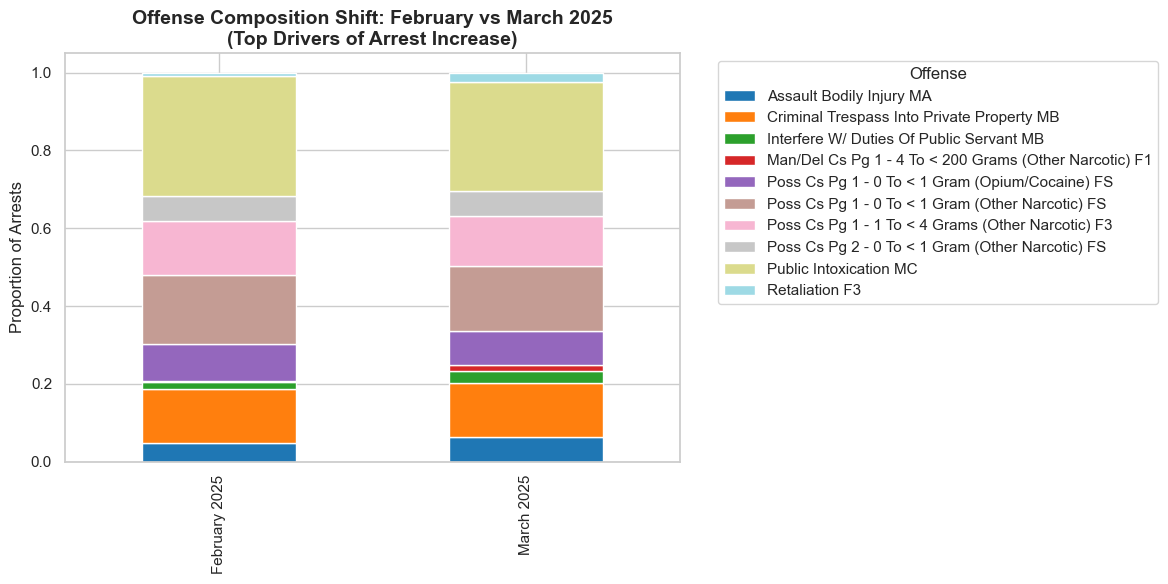

In [61]:
#Building stacked bar chart for top drivers in changes of arrest increase
stack_data.T.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap='tab20'
)

plt.title(
    'Offense Composition Shift: February vs March 2025\n(Top Drivers of Arrest Increase)',
    fontsize=14,
    fontweight='bold'
)
plt.ylabel('Proportion of Arrests')
plt.xlabel('')
plt.legend(title='Offense', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [62]:
## While public reporting indicates a decline in crime, arrest data shows a year-over-year
#increase in enforcement activity. This suggests changes in policing strategy or enforcement
#intensity rather than a contradiction in public safety outcomes

In [63]:
# Filter for only 2024 and 2025
df_recent = df_active[df_active['Year'].isin([2024, 2025])]

# Aggregate monthly incident counts
monthly_counts = (
    df_recent.groupby(['Year','Month'], as_index=False)
             .size()
             .rename(columns={'size':'Incident_Count'})
)


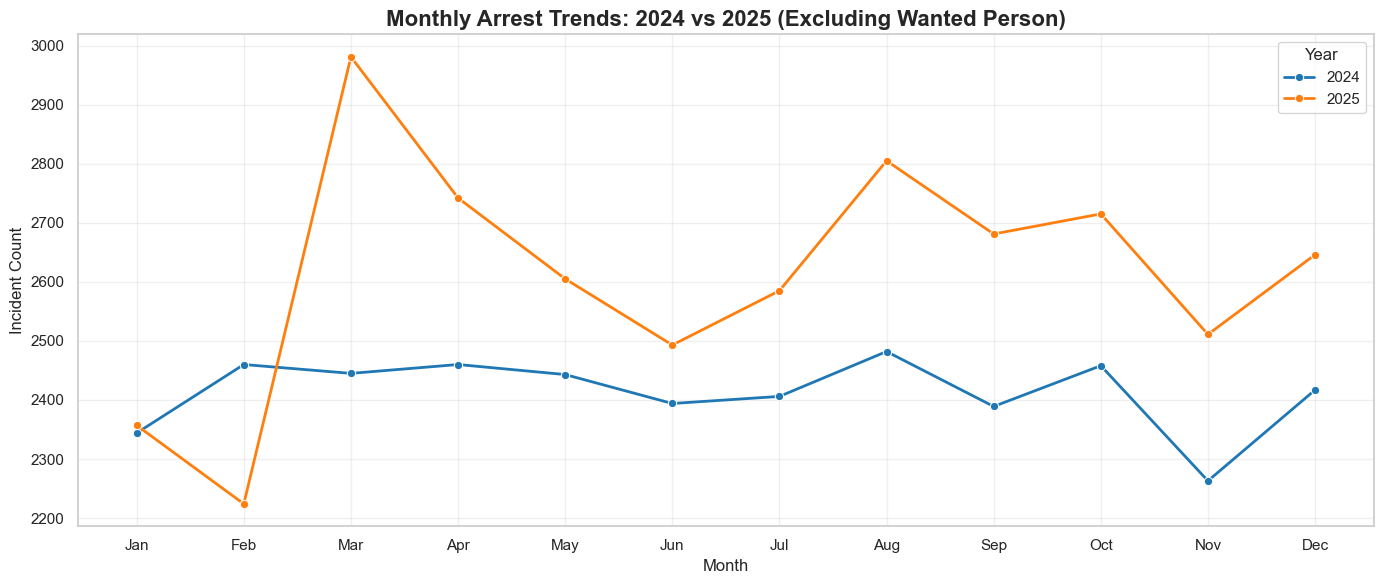

In [64]:
#Build line graph for 2024 and 2025
plt.figure(figsize=(14,6))

sns.lineplot(
    data=monthly_counts,
    x='Month',
    y='Incident_Count',
    hue='Year',
    marker='o',
    palette=['#1f77b4','#ff7f0e'],  # Blue = 2024, Orange = 2025
    linewidth=2
)

plt.title('Monthly Arrest Trends: 2024 vs 2025 (Excluding Wanted Person)', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.xticks(ticks=range(1,13), labels=[
    'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'
])
plt.grid(alpha=0.3)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


In [65]:
#2024 and 2025 plotted shows there to be a common trend for both years
#from June to December. Likely indicating seasonal trends or enforecement routines

In [66]:
#### Key Insights ####
#1. Most frequent offenses (excluding "wanted person")
#-----------------------------------------------------
#--#1Public Intoxication (through all service areas)
#--#2Criminal Trespass (except South and Downtown service areas)
#--#3Possession of narcotics (various classes)
# Wanted person dominated due to city wide warrant enforcement through all years

#2. Multiple Offense Incidents
#-------------------------------
#--~31% of incidents had multiple offenses
#--Average offenses per incident: 1.31 (after filtering out "add-on" charges) 
#--1.45 average with "add-on" charges included

#3. Area Patterns
#-----------------
#--Heatmaps show the number of incidents decrease as the move out from the center of the city
#with the 78207 zip code being the highest offending area by double
#-- Zip codes 78207(central), 78205(downtown), 78227(west), 78228(west), and 78237(west)
#consistently rank top in incidents

#4. Time period patterns
#------------------------
#--2024-2025 show strong seasonal trends from June to December with a near identical trend
#--Although the amount of incidents have risen each year, many of them are attributed to
#proactive arrests vs. reactive arrests showing police enforcement trends
#The spike from February to March in 2025 is primarily attributed to higher public intoxication
#possession charges. 

#Further research
#-----------------
#Further research and data is needed to drill down seasonal trends. Data pertaining to 
#police calls, bookings, and others to determine specifics